### **Data Preprocessing: A Crucial Step in Data Analytics**  

Data preprocessing is a fundamental stage in the data analysis process. It involves a series of steps to clean and prepare raw data for further analysis and modeling. The quality and structure of your data directly impact:  
- The accuracy of insights derived from the data.  
- The performance of machine learning models and predictive analytics.  

---

### **Why is Data Preprocessing Important?**  
Raw data is rarely perfect. It often contains issues that, if not handled properly, can skew analysis and lead to incorrect conclusions. The main challenges with raw data include:  

- **Missing Values**  
  - Data may have null values or incomplete records, affecting statistical calculations.  
  - Some models cannot process missing data without imputation.  

- **Duplicate Entries**  
  - Data may contain redundant rows, which can inflate metrics and lead to biased results.  

- **Incorrect Data Formats**  
  - Columns may contain data in an improper format (e.g., dates stored as strings).  
  - Numeric fields might be mistakenly represented as categorical variables.  

- **Inconsistent Data**  
  - Spelling variations in categorical data (e.g., "USA" vs. "U.S.A.") can cause grouping issues.  
  - Case inconsistencies and extra spaces in text fields can impact processing.  

- **Outliers**  
  - Extremely high or low values can distort statistical analysis and model predictions.  
  - Some outliers may be errors, while others might contain meaningful insights.  

- **Feature Scaling Issues**  
  - Datasets may have variables on different scales, requiring standardization or normalization.  

---


By applying these preprocessing techniques, data becomes more reliable, allowing for more accurate insights and better-performing analytical models.



## **Step 1: Loading the Dataset**
**Explanation**: We begin by loading the dataset into a Pandas DataFrame. This step allows us to examine the raw data and prepare it for analysis. The `head()` method shows the first few rows, giving a quick glimpse of the dataset structure.

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('/content/sales_data_s25.csv')

# Display the first few rows
data.head()

,OrderID,Product,Quantity,Price,OrderDate,CustomerID,Country
0,1,laptop,16.0,907.35,1/1/23,1040.0,France
1,2,Smart Phone,13.0,628.55,1/2/23,1059.0,NaN
2,3,Tablet,19.0,129.40,1/3/23,1013.0,Germany
3,4,Smart Phone,17.0,536.04,1/4/23,1074.0,Canada
4,5,Smart Phone,4.0,1214.14,1/5/23,1081.0,Spain


## **Step 2: Initial Data Inspection**
**Explanation**: This step involves understanding the dataset structure:
- **Shape**: Number of rows and columns.
- **Data Types**: Ensures columns have the correct format (e.g., numeric, date, or text).
- **Summary Statistics**: Describes the dataset (e.g., mean, median, and distribution of numeric data).

In [4]:
data.shape # (520, 7) means 520 columns and 7 rows

(520, 7)

In [5]:
data.info()
# non-null count = number of present values in each column.
# Ex: 518 means Product has 2 missing fields because it's out of 520
# Make sure date is always in date format for pandas (will fix later)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     520 non-null    int64  
 1   Product     518 non-null    object 
 2   Quantity    517 non-null    float64
 3   Price       466 non-null    float64
 4   OrderDate   520 non-null    object 
 5   CustomerID  468 non-null    float64
 6   Country     467 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 28.6+ KB


## **Step 3: Handling Missing Values**
**Explanation**: Missing values can introduce bias or inaccuracies. Address missing values by:
- **Imputation**: Replace missing values with the mean, median, or a constant.
- **Removal**: Drop rows or columns with excessive missing data.

For this dataset:
- Replace missing `Price` values with the median, as it is less affected by outliers.
- Drop rows with missing `CustomerID` and `Country` values since they are critical.

In [7]:
# Check for missing values
data.isnull()
# returns boolean expression
# false means the value has data. True means something is missing

data.isnull().sum()
# returns number of missing data

,0
OrderID,0
Product,2
Quantity,3
Price,54
OrderDate,0
CustomerID,52
Country,53


In [9]:
# Count rows with any missing values
data.isnull().any(axis=1).sum()
# returns number of rows with missing values
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html

142

In [10]:
# Display rows with missing values
data[data.isnull().any(axis=1)]
# statement in [ ] outputs true or false. The rows with "True" are displayed

,OrderID,Product,Quantity,Price,OrderDate,CustomerID,Country
1,2,Smart Phone,13.0,628.55,1/2/23,1059.0,NaN
5,6,Smartphone,12.0,NaN,1/6/23,1011.0,Australia
9,10,Smart Phone,9.0,1383.79,1/10/23,NaN,Spain
14,15,laptop,16.0,NaN,1/15/23,1044.0,Canada
17,18,Smart Phone,12.0,NaN,1/18/23,NaN,Canada
...,...,...,...,...,...,...,...
496,497,Tablet,14.0,844.01,5/11/24,NaN,Canada
497,498,Laptop,4.0,1235.08,5/12/24,1011.0,NaN
503,250,Tablet,17.0,1119.49,9/7/23,1022.0,NaN
511,130,Smart Phone,5.0,NaN,5/10/23,1007.0,Spain


In [20]:
# Create a new column 'MissingValueCount' that counts missing values in each row
data['MissingValueCount'] = data.isnull().sum(axis=1)

In [21]:
# Define the threshold for missing values
data.sort_values(by='MissingValueCount', ascending=False)
# TODO: Fix

,OrderID,Product,Quantity,Price,OrderDate,CustomerID,Country,MissingValueCount
519,412,NaN,NaN,NaN,2/16/24,NaN,NaN,5
494,495,NaN,NaN,NaN,5/9/24,NaN,NaN,5
122,123,Smart Phone,NaN,NaN,5/3/23,NaN,NaN,4
434,435,laptop,1.0,NaN,3/10/24,1023.0,NaN,2
206,207,Smart Phone,10.0,1390.37,7/26/23,NaN,NaN,2
...,...,...,...,...,...,...,...,...
184,185,Smartphone,11.0,318.44,7/4/23,1044.0,Spain,0
183,184,Smartphone,2.0,696.71,7/3/23,1022.0,Australia,0
182,183,Laptop,14.0,1427.84,7/2/23,1083.0,UK,0
181,182,Tablet,5.0,248.39,7/1/23,1037.0,Australia,0


In [22]:
n = 2

data[data['MissingValueCount'] <= 2 ]

,OrderID,Product,Quantity,Price,OrderDate,CustomerID,Country,MissingValueCount
0,1,laptop,16.0,907.35,1/1/23,1040.0,France,0
1,2,Smart Phone,13.0,628.55,1/2/23,1059.0,NaN,1
2,3,Tablet,19.0,129.40,1/3/23,1013.0,Germany,0
3,4,Smart Phone,17.0,536.04,1/4/23,1074.0,Canada,0
4,5,Smart Phone,4.0,1214.14,1/5/23,1081.0,Spain,0
...,...,...,...,...,...,...,...,...
514,335,laptop,12.0,1077.13,12/1/23,1029.0,USA,0
515,450,Smartphone,15.0,155.05,3/25/24,1096.0,UK,0
516,200,laptop,10.0,1391.61,7/19/23,1054.0,Spain,0
517,274,laptop,19.0,385.92,10/1/23,1089.0,Germany,0


In [25]:
price_median = data['Price'].median()
# Could also use the mean
price_mean = data['Price'].mean()

In [24]:
# Fill missing 'Price' values with the median
data['Price'] = data['Price'].fillna(price_median)

In [26]:
data.head()

,OrderID,Product,Quantity,Price,OrderDate,CustomerID,Country,MissingValueCount
0,1,laptop,16.0,907.35,1/1/23,1040.0,France,0
1,2,Smart Phone,13.0,628.55,1/2/23,1059.0,NaN,1
2,3,Tablet,19.0,129.40,1/3/23,1013.0,Germany,0
3,4,Smart Phone,17.0,536.04,1/4/23,1074.0,Canada,0
4,5,Smart Phone,4.0,1214.14,1/5/23,1081.0,Spain,0


In [27]:
# Replace missing 'CustomerID' with 'MissingID'
data['CustomerID'] = data['CustomerID'].fillna('MissingID')

In [33]:
# Replace missing 'Country' with its mode
# mode is the most frequent value
# Country is categorical and nominal
country_mode = data['Country'].mode()[0]
data['Country'] = data['Country'].fillna(country_mode)

In [29]:
data['Country'].mode() # Spain is the most common

,Country
0,Spain


In [31]:
data['Country'].value_counts()[0]

77

In [34]:
data.dropna(inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 0 to 518
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderID            517 non-null    int64  
 1   Product            517 non-null    object 
 2   Quantity           517 non-null    float64
 3   Price              517 non-null    float64
 4   OrderDate          517 non-null    object 
 5   CustomerID         517 non-null    object 
 6   Country            517 non-null    object 
 7   MissingValueCount  517 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 36.4+ KB


In [36]:
data.head()

,OrderID,Product,Quantity,Price,OrderDate,CustomerID,Country,MissingValueCount
0,1,laptop,16.0,907.35,1/1/23,1040.0,France,0
1,2,Smart Phone,13.0,628.55,1/2/23,1059.0,Spain,1
2,3,Tablet,19.0,129.40,1/3/23,1013.0,Germany,0
3,4,Smart Phone,17.0,536.04,1/4/23,1074.0,Canada,0
4,5,Smart Phone,4.0,1214.14,1/5/23,1081.0,Spain,0


## **Step 4: Removing Duplicates**
**Explanation**: Duplicate rows can inflate metrics or distort analysis results. Use Pandas' `duplicated()` method to identify and remove duplicates.

In [41]:
# Display duplicate rows
data[data.duplicated()]

,OrderID,Product,Quantity,Price,OrderDate,CustomerID,Country,MissingValueCount
500,172,Laptop,3.0,680.50,6/21/23,1049.0,USA,0
501,494,Laptop,1.0,1231.50,5/8/24,1061.0,Germany,0
502,457,Smart Phone,4.0,1180.78,4/1/24,1001.0,Germany,0
503,250,Tablet,17.0,1119.49,9/7/23,1022.0,Spain,1
504,165,Tablet,1.0,534.65,6/14/23,1011.0,Germany,0
505,173,Smartphone,18.0,407.28,6/22/23,1028.0,Spain,0
506,304,Smart Phone,2.0,237.80,10/31/23,1047.0,Germany,0
507,440,Laptop,10.0,673.94,3/15/24,1089.0,UK,0
508,31,Tablet,15.0,173.76,1/31/23,1058.0,USA,0
509,51,laptop,16.0,275.10,2/20/23,1019.0,Australia,0


In [42]:
# Check for the total number of duplicate rows
data.duplicated().sum()
# Keep in mind, the rows could be duplicated multiple times.

19

In [43]:
data.duplicated(keep=False).sum()
# Returns total instances of duplicated.

38

In [44]:
data[data.duplicated(keep=False)]

,OrderID,Product,Quantity,Price,OrderDate,CustomerID,Country,MissingValueCount
30,31,Tablet,15.0,173.76,1/31/23,1058.0,USA,0
50,51,laptop,16.0,275.10,2/20/23,1019.0,Australia,0
129,130,Smart Phone,5.0,747.53,5/10/23,1007.0,Spain,1
155,156,Laptop,17.0,1408.40,6/5/23,1028.0,Australia,0
164,165,Tablet,1.0,534.65,6/14/23,1011.0,Germany,0
171,172,Laptop,3.0,680.50,6/21/23,1049.0,USA,0
172,173,Smartphone,18.0,407.28,6/22/23,1028.0,Spain,0
199,200,laptop,10.0,1391.61,7/19/23,1054.0,Spain,0
223,224,laptop,4.0,507.17,8/12/23,1068.0,UK,0
249,250,Tablet,17.0,1119.49,9/7/23,1022.0,Spain,1


In [45]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderID            498 non-null    int64  
 1   Product            498 non-null    object 
 2   Quantity           498 non-null    float64
 3   Price              498 non-null    float64
 4   OrderDate          498 non-null    object 
 5   CustomerID         498 non-null    object 
 6   Country            498 non-null    object 
 7   MissingValueCount  498 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 35.0+ KB


## **Step 5: Standardizing Text Data**
**Explanation**: Text data often contains inconsistencies (e.g., varying cases or extra spaces). Standardization ensures uniform formatting, making data easier to analyze.

In [47]:
data['Product'].unique()
# There are two laptop categories: Laptop and laptop

array(['laptop', 'Smart Phone', 'Tablet', 'Smartphone', 'Laptop'],
      dtype=object)

In [58]:
data['Product'] = data['Product'].str.lower().replace("smart phone", "smartphone")
# makes all products lower case to remove duplicate laptop categories
# also makes turns smart phone with smartphone

In [59]:
data['Product'].unique()

array(['laptop', 'smartphone', 'tablet'], dtype=object)

In [60]:
# Standardize 'Product' and 'Country' columns
data['Country'].unique()

array(['france', ' spain', 'germany ', 'canada', 'australia', 'usa ',
       'uk'], dtype=object)

In [61]:
data['Country'] = data['Country'].str.strip() # removes the extra spaces that were before and after the country values

In [62]:
data['Country'].unique()

array(['france', 'spain', 'germany', 'canada', 'australia', 'usa', 'uk'],
      dtype=object)

## **Step 6: Correcting Data Types**
**Explanation**: Columns should have appropriate data types:
- Dates: Converted to `datetime` for proper sorting and filtering.
- Numeric IDs: Converted to integers for efficiency.

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderID            498 non-null    int64  
 1   Product            498 non-null    object 
 2   Quantity           498 non-null    float64
 3   Price              498 non-null    float64
 4   OrderDate          498 non-null    object 
 5   CustomerID         498 non-null    object 
 6   Country            498 non-null    object 
 7   MissingValueCount  498 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 35.0+ KB


In [64]:
data['OrderDate'] = pd.to_datetime(data['OrderDate']) # Changes OrderDate from an object type to a datetime object type

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OrderID            498 non-null    int64         
 1   Product            498 non-null    object        
 2   Quantity           498 non-null    float64       
 3   Price              498 non-null    float64       
 4   OrderDate          498 non-null    datetime64[ns]
 5   CustomerID         498 non-null    object        
 6   Country            498 non-null    object        
 7   MissingValueCount  498 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 35.0+ KB


## **Step 7: Handling Outliers**
**Explanation**: Outliers are extreme values that can skew analysis. To detect outliers, use the **Interquartile Range (IQR)**:
1. Calculate the **first quartile (Q1)** and **third quartile (Q3)**.
2. Compute the IQR: \( IQR = Q3 - Q1 \).
3. Define thresholds:
   - Lower Bound: \( Q1 - 1.5 \times IQR \)
   - Upper Bound: \( Q3 + 1.5 \times IQR \)
4. Remove data points outside these thresholds.

**Visualization**: Boxplots are useful for identifying outliers in numeric columns.

In [66]:
# Visualize outliers using a boxplot
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7d6c0d4b3550>,
 'caps': [<matplotlib.lines.Line2D at 0x7d6c0d4b2850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d6c0dafa1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d6c0d8d0410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d6c0d8d0b10>],
 'means': []}

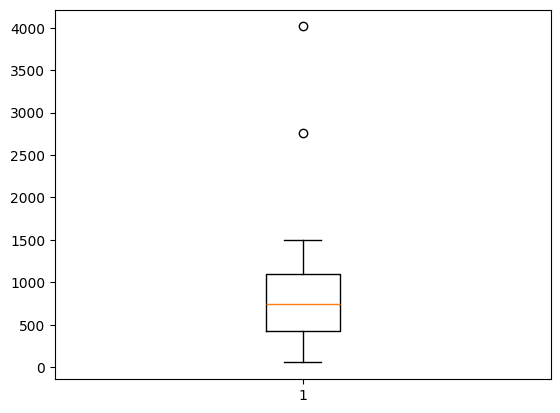

In [67]:
plt.boxplot(data['Price'])

In [73]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)

IQR = Q3 - Q1
IQR

671.8825

In [74]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [75]:
lower_bound, upper_bound

(-581.16375, 2106.36625)

In [78]:
data = data[(data['Price'] >= 0) & (data['Price'] <= upper_bound)]


{'whiskers': [<matplotlib.lines.Line2D at 0x7d6c0d4b6190>,
 'caps': [<matplotlib.lines.Line2D at 0x7d6c0d4b7550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d6c0d4b58d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d6c0d506050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d6c0da8d190>],
 'means': []}

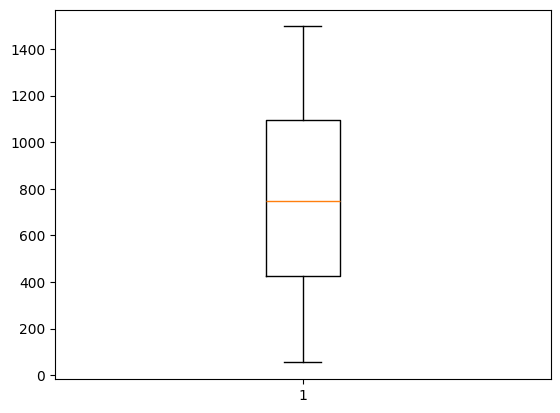

In [79]:
# Visualize outliers using a boxplot
plt.boxplot(data['Price'])

## **Step 8: Feature Engineering**
**Explanation**: Create new features to enhance the dataset. For example:
- `TotalValue`: The total sales value for each order (\( Quantity \times Price \)).

In [80]:
# Create a new feature 'TotalValue'
data['TotalValue'] = data['Quantity'] * data['Price']

In [81]:
data.head()

,OrderID,Product,Quantity,Price,OrderDate,CustomerID,Country,MissingValueCount,TotalValue
0,1,laptop,16.0,907.35,2023-01-01,1040.0,france,0,14517.60
1,2,smartphone,13.0,628.55,2023-01-02,1059.0,spain,1,8171.15
2,3,tablet,19.0,129.40,2023-01-03,1013.0,germany,0,2458.60
3,4,smartphone,17.0,536.04,2023-01-04,1074.0,canada,0,9112.68
4,5,smartphone,4.0,1214.14,2023-01-05,1081.0,spain,0,4856.56


In [82]:
!jupyter nbconvert --to html '/content/Data_Preprocessing_start_Ian_Gabriel_Eusebio.ipynb'

[NbConvertApp] Converting notebook /content/Data_Preprocessing_start_Ian_Gabriel_Eusebio.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 438737 bytes to /content/Data_Preprocessing_start_Ian_Gabriel_Eusebio.html
